# Counting objects
Here we try to find objects of a certain color and count them.
Here we select amongst Red, Blue and Green and give a count of each color, when the objects are spread apart on a clear background.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We create 2 functions which are used for
- displaying one big image
- displaying 2 labeled images

In [ ]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()    

Now, we create color_counter that counts the number of objects of a given color among red(r), green(g) and blue(b) 

In [ ]:
def color_counter(image, color = 'r'):
  try:
      print('Original size',image.shape)
  except AttributeError:
      print("shape not found")
   
  #BGR
  if color == 'r':
    lower_color_bounds = np.array([0,0,150])
    upper_color_bounds = np.array([150,100,255])
  elif color == 'g':  
    lower_color_bounds = np.array([0,100,0])
    upper_color_bounds = np.array([105,255,100])
  elif color == 'b':  
    lower_color_bounds = np.array([120,0,0])
    upper_color_bounds = np.array([255,100,100])  
  else:  
    print('INVALID COLOR')
    return 0

  mask = cv2.inRange(image,lower_color_bounds,upper_color_bounds)
  kernel = np.ones((10,10),np.float32)/100
  image_blur_gray = cv2.filter2D(mask,-1,kernel)
  image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)
  #display_one(image_thresh,'image thresh')

  kernel = np.ones((2,2),np.uint8)
  opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 
  #display_one(opening,'opening')

  last_image = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, last_image =  cv2.threshold(last_image, 0.03*last_image.max(),255,0)
  #display_one(last_image,'last image')

  last_image = last_image.astype(np.uint8)
  cnts = cv2.findContours(last_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]

  display(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),last_image,'original','{} selected'.format(color))
  return(len(cnts)-1)


In [ ]:
def color_profile(image):
  display_one(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  r = color_counter(image,'r')
  g = color_counter(image, 'g')
  b = color_counter(image, 'b')
  print('{} red objects\n{} green objects\n{} blue objects'.format(r,g,b))

In [ ]:
image = cv2.imread("pom3.jpg")

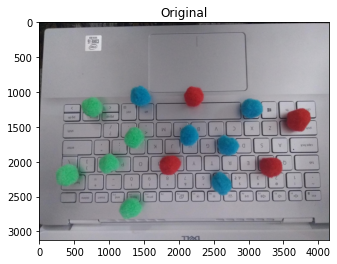

Original size (3120, 4160, 3)


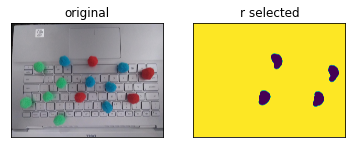

Original size (3120, 4160, 3)


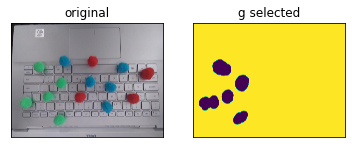

Original size (3120, 4160, 3)


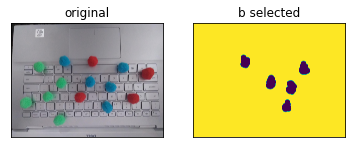

4 red objects
5 green objects
5 blue objects


In [ ]:
color_profile(image)